In [5]:
ROOTDIR <- "./"
source(paste0(ROOTDIR,"fitmodels.R"))
source(paste0(ROOTDIR,"odam.R"))
source(paste0(ROOTDIR,"growth.R"))

# FRIMOUSS dataset managed by ODAM
dh <- new('odamws', URLWS, 'Frimouss')
collection <- get_Collection()
collection[, c(2,3,5)]

,datasetID,label,description
,<chr>,<chr>,<chr>
1,FR17AP003,Apple,Malus domestica (3750)
2,FR17CL004,Clementine,Citrus clementina (85681)
3,FR17CC005,Cucumber,Cucumis sativus (3659)
4,FR17EP006,Eggplant,Solanum melongena (4111)
5,FR17KW007,Kiwi,Actinidia deliciosa (3627)
6,FR17GV001,Grapevine,Vitis vinifera (29760)
7,FR17PE008,Peach,Prunus persica (3760)
8,FR17PP009,Pepper,Capsicum (4071)
9,FR17SB002,Strawberry,Fragaria x ananassa (3747)


In [6]:
# Sample subset name
setName <- c('fruits')

# Modelization of the fruit fresh weigth
Yname <- 'Weight'

dataSets <- collection$datasetID[c(1:8)]
dataNames <- collection$label[c(1:8)]

# Set all fneg to false
fnegSet <- rep(FALSE,length(dataSets))
# Except : Clementine & Pepper to TRUE
fnegSet[c(2,8)] <- TRUE

# Set all Vmax to 50
VmaxSet <- rep(50,length(dataSets))
# Except : Pepper to 25
VmaxSet[8] <- 25

set.seed(1674)
system.time({
   fitObj <- compute_growth_set(dataSets, setName, Yname, VmaxSet, fnegSet, model=2, noptim=400)
})

Model 2 :
FR17AP003 - Fneg = FALSE - Vmax = 50 - Getting ... Fitting ... ( 2 ) R2 = 0.9989488  OK
FR17CL004 - Fneg = TRUE - Vmax = 50 - Getting ... Fitting ... ( 2 ) R2 = 0.9992729  OK
FR17CC005 - Fneg = FALSE - Vmax = 50 - Getting ... Fitting ... ( 2 ) R2 = 0.9994769  OK
FR17EP006 - Fneg = FALSE - Vmax = 50 - Getting ... Fitting ... ( 2 ) R2 = 0.9998763  OK
FR17KW007 - Fneg = FALSE - Vmax = 50 - Getting ... Fitting ... ( 2 ) R2 = 0.9932167  OK
FR17GV001 - Fneg = FALSE - Vmax = 50 - Getting ... Fitting ... ( 2 ) R2 = 0.9853759  OK
FR17PE008 - Fneg = FALSE - Vmax = 50 - Getting ... Fitting ... ( 2 ) R2 = 0.998475  OK
FR17PP009 - Fneg = TRUE - Vmax = 25 - Getting ... Fitting ... ( 2 ) R2 = 0.9981183  OK


   user  system elapsed 
 23.599   0.017  45.330 

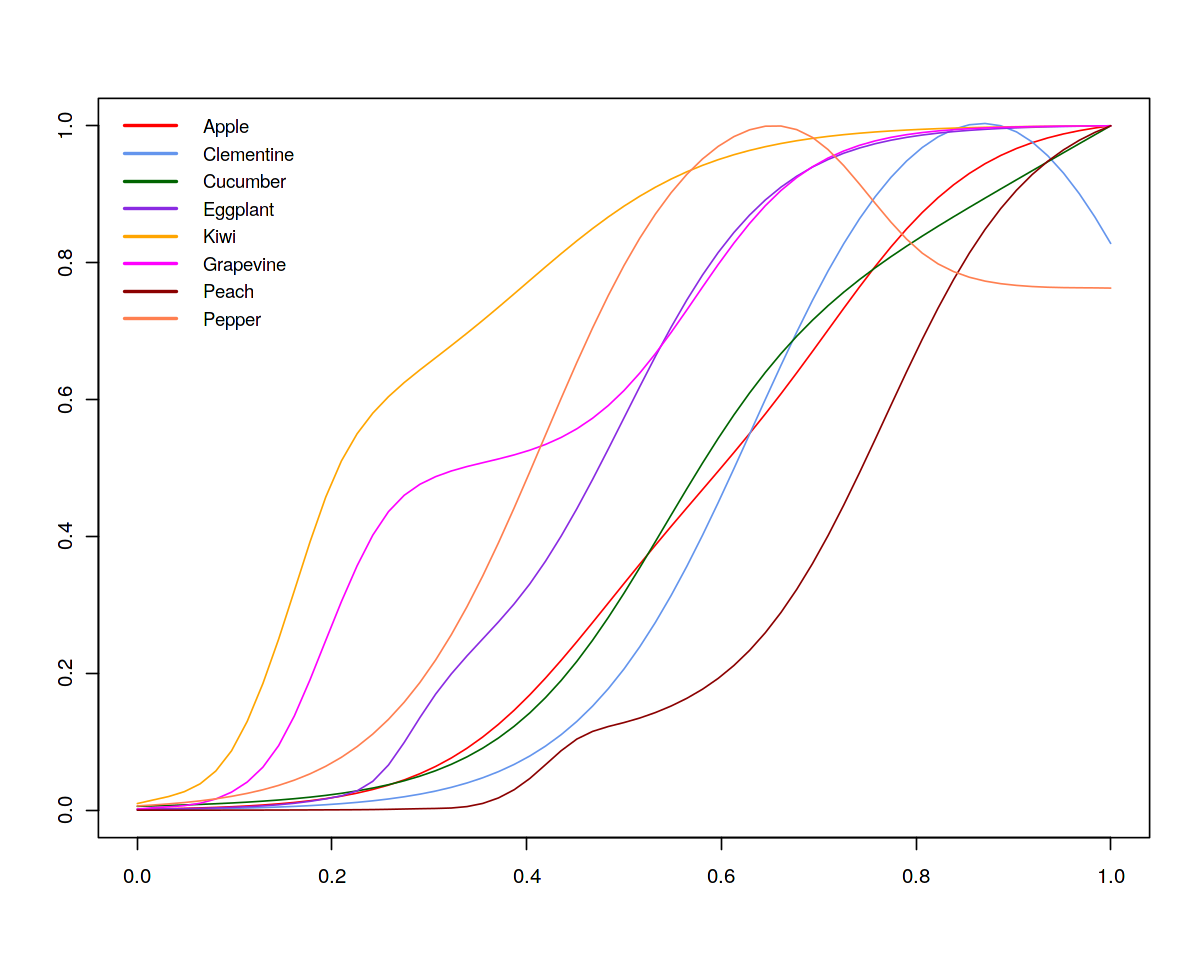

In [7]:
options(repr.plot.width=10, repr.plot.height=8)
plot_growth_set(fitObj, legend=dataNames)

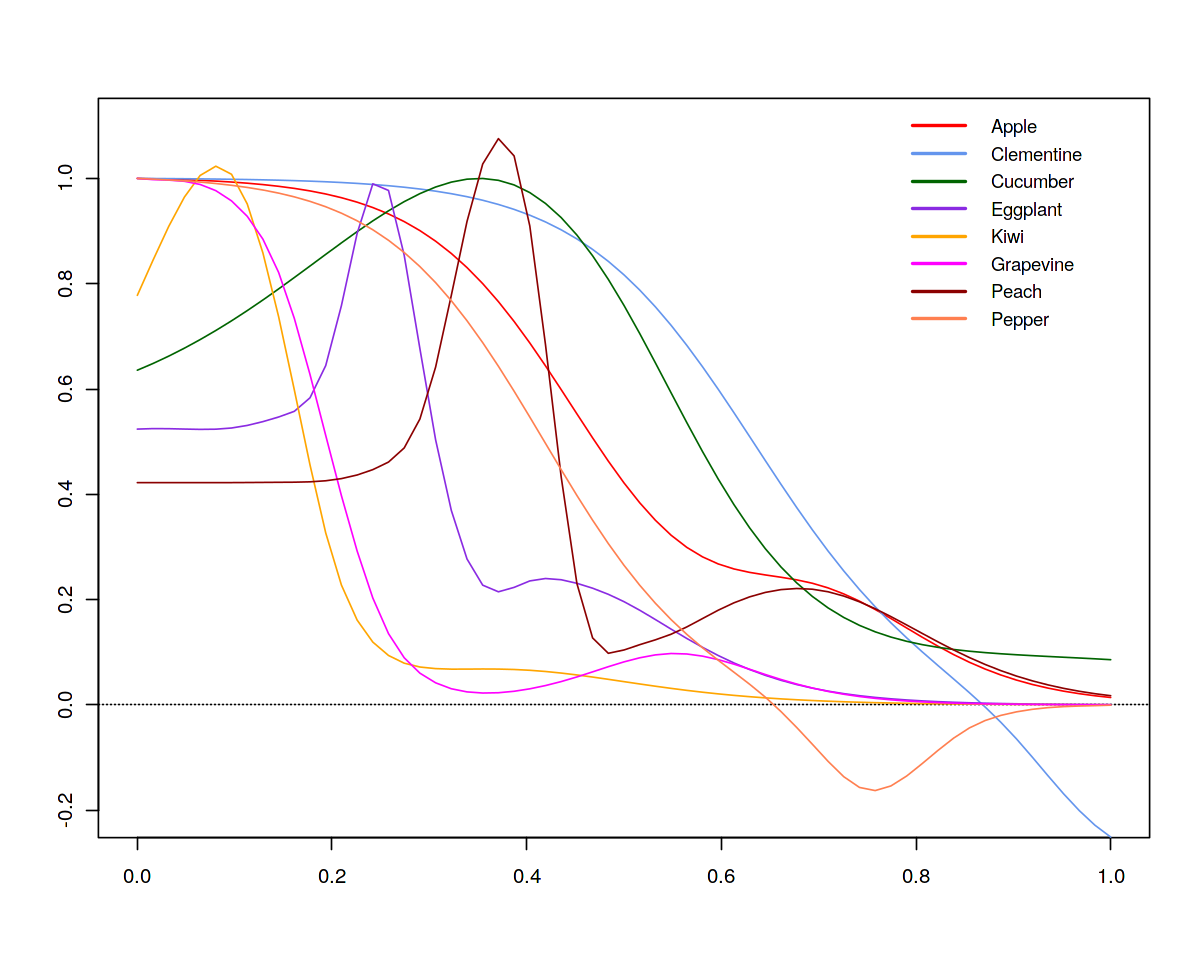

In [8]:
options(repr.plot.width=10, repr.plot.height=8)
plot_RGR_set(fitObj, legend=dataNames)